In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import scikit_posthocs as sp
import sys

from mpl_toolkits.mplot3d import axes3d

In [2]:
totn = [1429.511096, 195.93417907, 174.12488914, 149.39460301, 157.55367208]
processes = [2, 20, 40, 80, 160]
iters = []
tot_iters = 1000
for it_value in totn:
    iters.append(it_value / tot_iters)
print(iters)

labelsMethods_aux = ['Merge - COLS',
                    'Merge - COLA',
                    'Ideal']

[1.429511096, 0.19593417907, 0.17412488914, 0.14939460301, 0.15755367208]


In [23]:
#OFI REDUCCION

#CON BARRIERS
malls = [1.191402, 3.13309, 2.585917, 2.569179, 0.777284, 1.033414, 0.920364, 0.668779, 0.519809, 0.334906]
malla = [1.612513, 3.265418, 2.965351, 2.98502, 1.002663, 1.030409, 1.112991, 0.873688, 0.871016, 0.727469]
#SIN BARRIERS
#malls = []
#malla = []
labels_aux = ['(20,2)', '(40,2)', '(80,2)', '(160,2)', '(40,20)', '(80,20)', '(160,20)', '(80,40)', '(160,40)', '(160,80)']
tuples_aux = [ (20,2),   (40,2),   (80,2),   (160,2),   (40,20),   (80,20),   (160,20),   (80,40),   (160,40),   (160,80)]
tots = [814.67876291, 808.5604651, 795.9308548, 795.54596305, 190.34062719, 177.72450495, 176.88434005, 163.42062998, 161.76110101, 147.07955885]
tota = [816.94620895, 807.90405488, 792.34561992, 789.45519304, 183.67259693, 176.26401806, 173.38925004, 159.47613788, 164.16760778, 146.63839984]

spawn_min = [1.45000e-04, 6.29000e-04, 1.05700e-03, 1.47300e-03, 5.85000e-04, 1.04000e-03, 1.42700e-03, 1.04200e-03, 1.53700e-03, 1.44100e-03]

In [15]:
#OFI EXPANSION

tots = [822.592448, 812.38741612, 687.25450993, 792.73712492, 189.64718318, 180.3323071, 183.42675281, 163.77047706, 156.8667469, 146.14701796]
tota = [827.57983398, 808.741225, 691.38776207, 798.37592387, 188.47194409, 182.5640409, 177.40146399, 161.12198901, 164.66972589, 150.13075709]

labels_aux = ['(2,20)', '(2,40)', '(2,80)', '(2,160)', '(20,40)', '(20,80)', '(20,160)', '(40,80)', '(40,160)', '(80,160)']
tuples_aux = [(2,20),    (2,40),   (2,80),   (2,160),   (20,40),   (20,80),   (20,160),   (40,80),   (40,160),   (80,160)]
#CON BARRIERS
malls = [1.459048, 1.377933, 1.562658, 1.646107, 1.336804, 1.289738, 1.335803, 1.006473, 1.193941, 1.098027]
malla = [4.291689, 4.300612, 5.926505, 6.496032, 1.582687, 1.722409, 1.863822, 1.683262, 1.657882, 1.50607]
#SIN BARRIERS 
#malls = [1.386815, 1.352518, 1.552363, 1.545332, 1.200833, 1.278144, 1.446389, 1.350773, 1.233166, 1.073713]
#malla = [4.266167, 4.137584, 4.408637, 7.202143, 1.580283, 1.684443, 1.784895, 1.481095, 1.592655, 1.49029]

spawns = [0.646706, 0.637626, 0.79149, 0.874327, 0.703415, 0.77506, 0.923799, 0.922304, 0.875446, 0.808462]
spawna = [0.667736, 0.599761, 0.883783, 1.069666, 0.683896, 0.838215, 0.875225, 0.769545, 0.918761, 0.887716]

reds_s = [0.031203, 0.034094, 0.036393, 0.036872, 0.325629, 0.161447, 0.051848, 0.275889, 0.117939, 0.124082]
reds_a = [0.016136, 0.018315, 0.017299, 0.020972, 0.00817, 0.008836, 0.010475, 0.006352, 0.006724, 0.001864]

spawn_min = [5.68926e-01, 5.94807e-01, 6.34480e-01, 7.45979e-01, 5.23472e-01, 6.66369e-01, 8.03722e-01, 6.67325e-01, 8.09060e-01, 7.51335e-01,]

In [4]:
iters_a = [] # Total de iteraciones asincronas esperadas
iters_s = [] # Total de iteraciones sincronas esperadas para caso ideal
for index in range(len(malla)):
    index_iter = index%len(iters)
    mall_aux = malla[index] - spawna[index] - reds_a[index] 
    aux_value = math.ceil( mall_aux / iters[index_iter])
    aux_value = max(aux_value, 2)
    iters_a.append(aux_value)
    
    mall_aux = malls[index] - spawns[index] - reds_s[index] 
    aux_value = math.ceil(mall_aux / iters[index_iter])
    aux_value = max(aux_value, 2)
    iters_s.append(aux_value)
print(iters_a)
print(iters_s)
iters_a = np.array(iters_a)
iters_s = np.array(iters_s)

NameError: name 'spawna' is not defined

In [5]:
ideal = []
for index in range(len(tota)):
    index_iter = index%len(iters)
    aux_value = tots[index] - malls[index]
    ideal.append(aux_value)
print(ideal)
print(tota)

[813.48736091, 805.4273751, 793.3449378, 792.97678405, 189.56334318999998, 176.69109095000002, 175.96397604999999, 162.75185098, 161.24129201, 146.74465285000002]
[816.94620895, 807.90405488, 792.34561992, 789.45519304, 183.67259693, 176.26401806, 173.38925004, 159.47613788, 164.16760778, 146.63839984]


In [6]:
ideal2 = []
for tuple_aux in tuples_aux:
    index1 = tuple_aux[0]
    index1 = processes.index(index1)
    index2 = tuple_aux[1]
    index2 = processes.index(index2)
    val_aux = (iters[index1] + iters[index2]) * 500
    ideal2.append(val_aux)
print(ideal2)

[812.722637535, 801.81799257, 789.4528495049999, 793.5323840399999, 185.029534105, 172.66439103999997, 176.74392557500002, 161.75974607499998, 165.83928061, 153.474137545]


In [7]:
iters_diff = iters_a - iters_s
iters_diff

ideal3 = []
for index in range(len(tota)):
    index_iter = index%len(iters)
    aux_value = tota[index] - malla[index] + (iters_diff[index] * iters[index_iter])
    ideal3.append(aux_value)
print(ideal3)
print(tota)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [24]:
ideal4 = []
L = 5 * (10 **-6)
B = 100 * (10 **9)
D = 3550186388 * 8
print(L)
print(B)
for spawn_value in spawn_min:
    aux_value = L + D / B
    ideal4.append(aux_value + spawn_value)
print(ideal4)

4.9999999999999996e-06
100000000000
[0.28416491103999997, 0.28464891103999995, 0.28507691103999994, 0.28549291103999996, 0.28460491103999996, 0.28505991103999995, 0.28544691104, 0.28506191103999995, 0.28555691103999997, 0.28546091104]


In [ ]:
colors_m = ( 
    colors.to_rgba("red"), #MCOLS
    colors.to_rgba("blue"), #MCOLA 
    colors.to_rgba("red"), #MRMA1T
    colors.to_rgba("mediumseagreen"), #BCOLA
    colors.to_rgba("orange"), #BCOLA
    )
f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)

x = np.arange(len(labels_aux))
plot_index = 0
#ax.plot(x, tots, color=colors_m[plot_index], linestyle='-', marker= '.', markersize=18, label="Sinc")
tota_tmp = []
tots_tmp = []
ideal_tmp = []
ideal4_tmp = []
for index in range(len(tota)):
    tota_tmp.append(ideal2[index] / tota[index])
    tots_tmp.append(ideal2[index] / tots[index])
    ideal_tmp.append(ideal2[index] / ideal[index])
    ideal4_tmp.append(ideal[index] / ideal4[index])
    '.','v','s','p',
plot_index = 1
ax.plot(x, tots_tmp, color=colors_m[plot_index], linestyle='--', marker='v', markersize=18, label="Sinc")
plot_index = 2
ax.plot(x, tota_tmp, color=colors_m[plot_index], linestyle=':', marker='s', markersize=18, label="Asinc")
plot_index = 3
ax.plot(x, ideal_tmp, color=colors_m[plot_index], linestyle='-.', marker='p', markersize=18, label="Ideal")
plot_index = 4
#ax.plot(x, ideal4_tmp, color=colors_m[plot_index], linestyle='-.', marker='h', markersize=18, label="Ideal4")

ax.set_xlabel("(NS,NT)", fontsize=36)
name_legend = "Difference over Ideal"
ax.set_ylabel(name_legend, fontsize=36)
plt.xticks(x, labels_aux,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)
ax.axhline(y=1, color='black', linestyle='--')
    
#plt.ylim([0,1.1])
f.tight_layout()
f.savefig("Images/TEST"+".eps", format="eps", dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[1.191402, 3.13309, 2.585917, 2.569179, 0.777284, 1.033414, 0.920364, 0.668779, 0.519809, 0.334906]
[1.612513, 3.265418, 2.965351, 2.98502, 1.002663, 1.030409, 1.112991, 0.873688, 0.871016, 0.727469]
[0.28416491103999997, 0.28464891103999995, 0.28507691103999994, 0.28549291103999996, 0.28460491103999996, 0.28505991103999995, 0.28544691104, 0.28506191103999995, 0.28555691103999997, 0.28546091104]


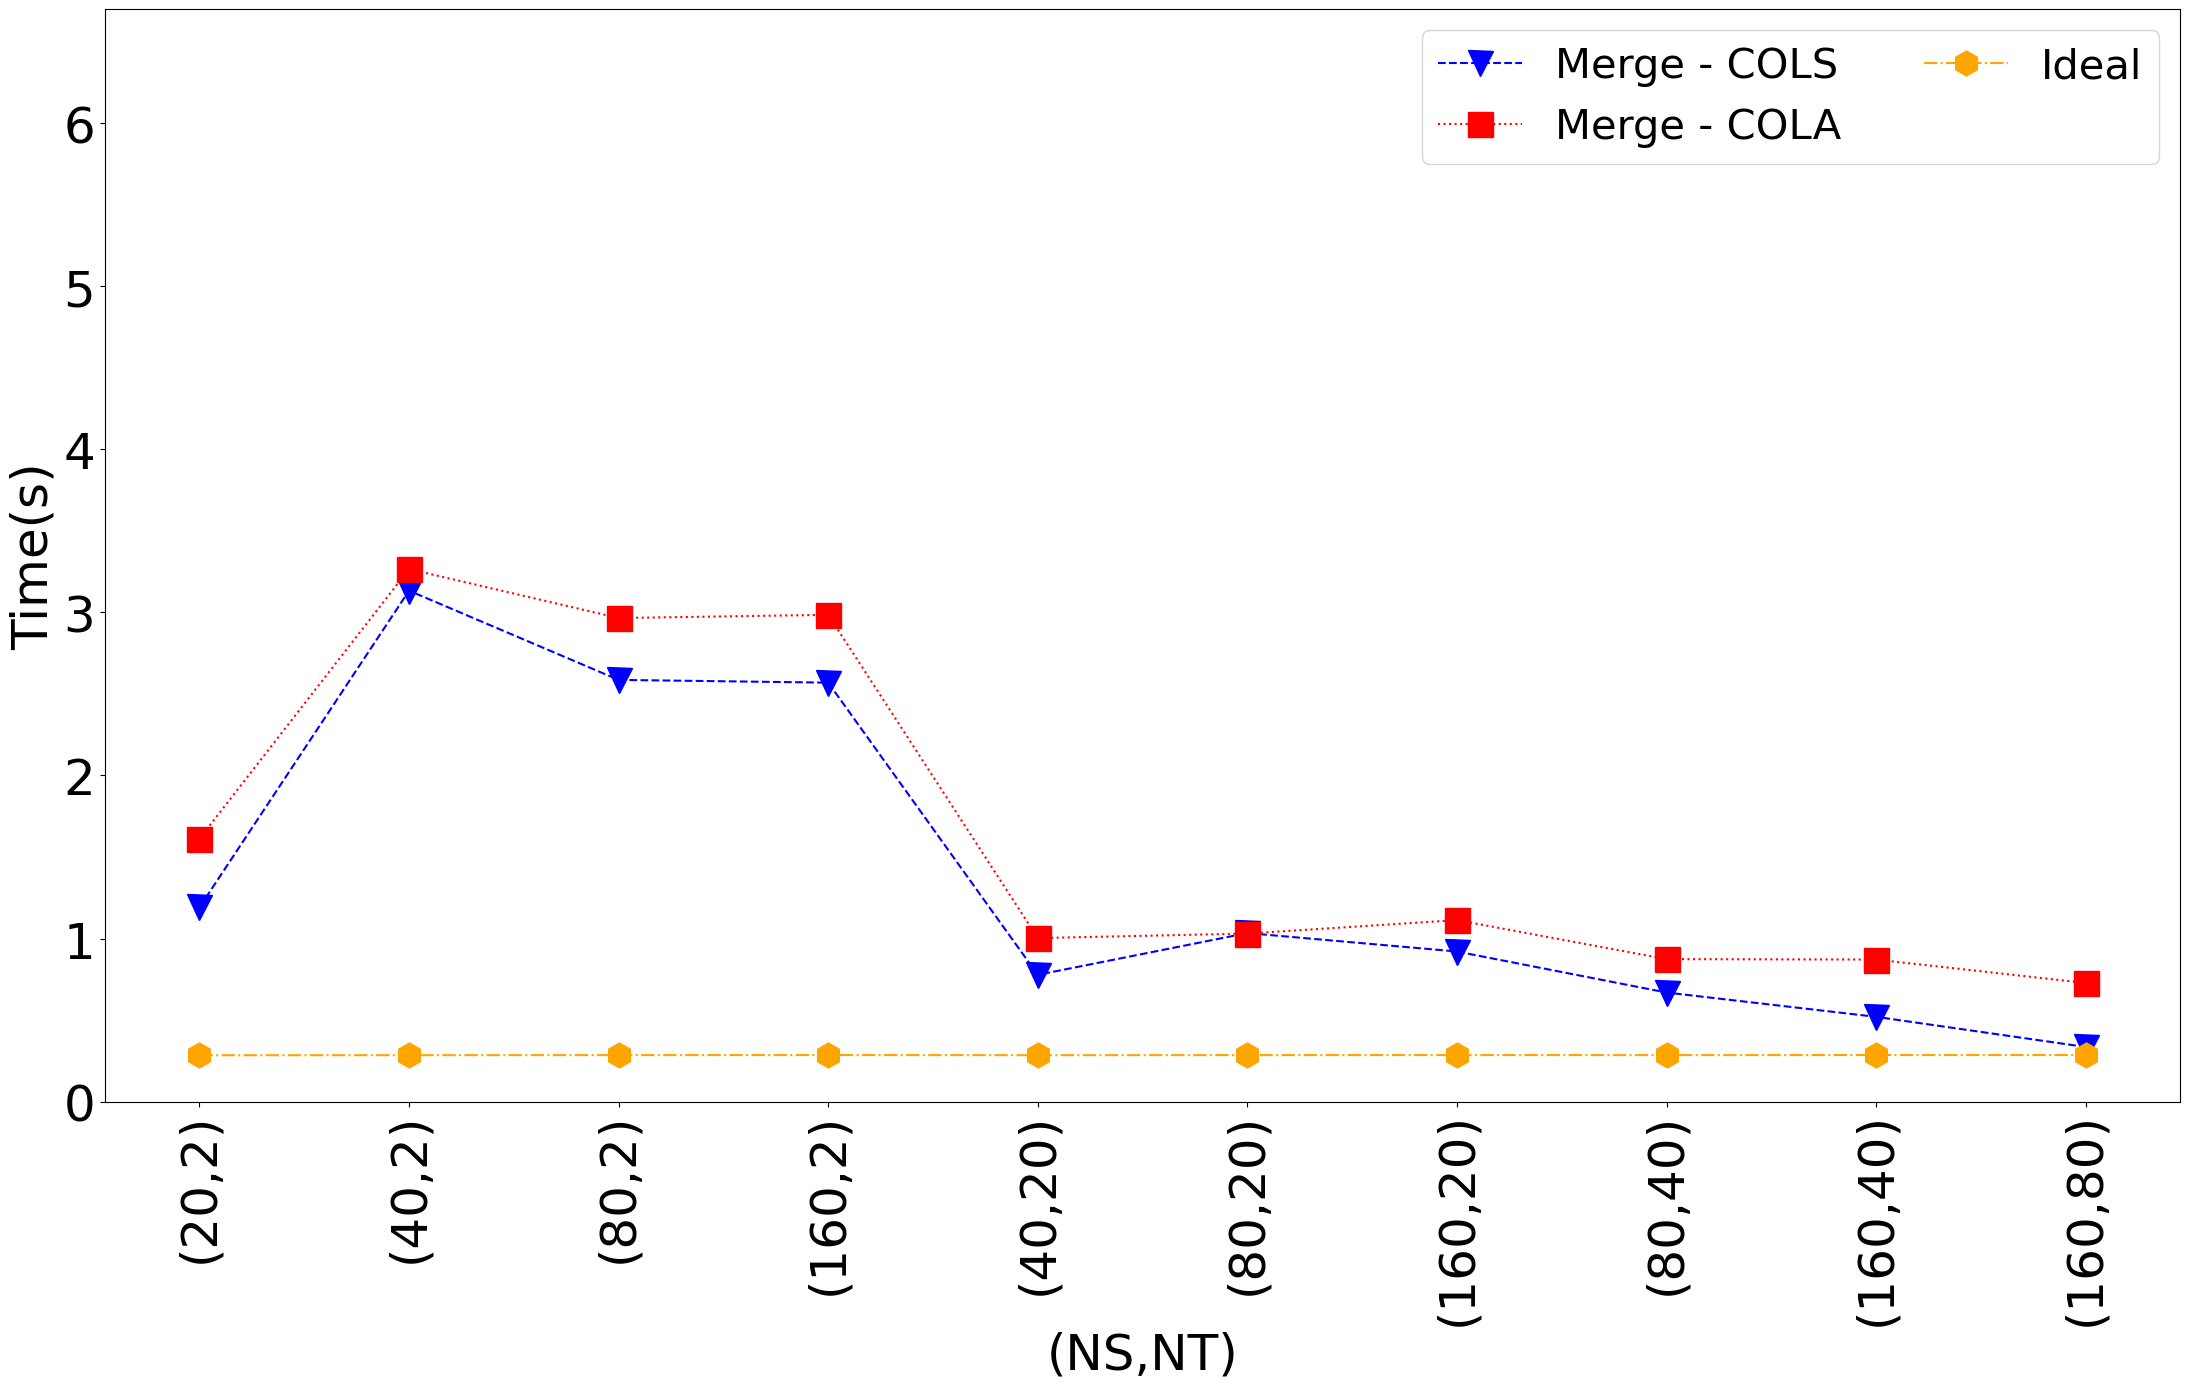

In [25]:
colors_m = ( 
    colors.to_rgba("blue"), #MCOLA 
    colors.to_rgba("red"), #MRMA1T
    colors.to_rgba("orange"), #BCOLA
    )
f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)

x = np.arange(len(labels_aux))
plot_index = 0
#ax.plot(x, tots, color=colors_m[plot_index], linestyle='-', marker= '.', markersize=18, label="Sinc")
malla_tmp = malla.copy()
malls_tmp = malls.copy()
#for index in range(len(tota)):
    #malla_tmp[index] = malla[index] / ideal4[index]
    #malls_tmp[index] = malls[index] / ideal4[index]
    #malla_tmp[index] = ideal4[index] / malla[index]
    #malls_tmp[index] = ideal4[index] / malls[index]
plot_index = 0
ax.plot(x, malls_tmp, color=colors_m[plot_index], linestyle='--', marker='v', markersize=18, label=labelsMethods_aux[plot_index])
plot_index = 1
ax.plot(x, malla_tmp, color=colors_m[plot_index], linestyle=':', marker='s', markersize=18, label=labelsMethods_aux[plot_index])
plot_index = 2
ax.plot(x, ideal4, color=colors_m[plot_index], linestyle='-.', marker='h', markersize=18, label=labelsMethods_aux[plot_index])

ax.set_xlabel("(NS,NT)", fontsize=36)
name_legend = "Time(s)"
ax.set_ylabel(name_legend, fontsize=36)
plt.xticks(x, labels_aux,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)
#ax.axhline(y=1, color='black', linestyle='--')

print(malls_tmp)
print(malla_tmp)
print(ideal4)
plt.ylim([0,6.7])
f.tight_layout()
f.savefig("Images/TEST"+".eps", format="eps", dpi=300)

In [62]:
row = 2017169
matrix = 283073458

mam = row * 8 * 5
user = (matrix * (4 + 8)) + (row * 4)
print("  " +str(mam))
print(user)

  80686760
3404950172


In [12]:
user/mam

42.19961455881981

In [81]:
3550186388 / (1000 * 1000 * 1000)

3.550186388

In [18]:
testa = np.array(malla_tmp)
tests = np.array(malls_tmp)
tests- testa

array([-3.32100894, -3.32565943, -4.75105871, -4.70867003, -0.30450212,
       -0.45525678, -0.48542673, -0.71140234, -0.42443466, -0.3941093 ])